In [46]:
import pandas as pd
import numpy as np
import re

### 

def get_statusid_and_date_date():
    query = ("https://data.cityofnewyork.us/resource/gp4p-wib8.json?"
             "$select=statusdate,%20statusid"
             "&$limit=1000&$order=:id&$offset=0")
    statusid_and_date = pd.read_json(query)
    print statusid_and_date[0:10]
    more_data = True
    i=1
    while more_data == True:
        query = ("https://data.cityofnewyork.us/resource/gp4p-wib8.json?"
             "$select=statusdate,%20statusid"
             "&$limit=1000&$order=:id&$offset=" + str(i*1000))
        data_page = pd.read_json(query)
        statusid_and_date = pd.concat([statusid_and_date, data_page],ignore_index=True)
        print 'Currently have ', len(statusid_and_date), ' records'
        i +=1
        if len(data_page) < 1000:
            more_data = False
    return statusid_and_date

statusid_and_date = get_statusid_and_date_date()

                statusdate  statusid
0  2015-07-16T00:00:00.000         2
1  2015-07-16T00:00:00.000         2
2  2015-07-16T00:00:00.000         2
3  2014-07-29T00:00:00.000         2
4  2014-08-04T00:00:00.000         2
5  2014-08-04T00:00:00.000         2
6  2014-08-04T00:00:00.000         2
7  2014-08-22T00:00:00.000         2
8  2014-07-29T00:00:00.000         2
9  2014-07-29T00:00:00.000         2
Currently have  2000  records
Currently have  3000  records
Currently have  4000  records
Currently have  5000  records
Currently have  6000  records
Currently have  7000  records
Currently have  8000  records
Currently have  9000  records
Currently have  10000  records
Currently have  11000  records
Currently have  12000  records
Currently have  13000  records
Currently have  14000  records
Currently have  15000  records
Currently have  16000  records
Currently have  17000  records
Currently have  18000  records
Currently have  19000  records
Currently have  20000  records
Currently ha

In [77]:
statusid_and_date = statusid_and_date.dropna(axis=0)
print (len(statusid_and_date))

785796


In [90]:
import time
import re

def just_date(string):
    split_string = re.split(r'T',str(string))
    string = split_string[0] + ' ' + split_string[1]
    return string
 
statusid_and_date['proc_date'] = statusid_and_date.statusdate.map(just_date)
statusid_and_date['proc_date'] = pd.to_datetime(statusid_and_date['proc_date'], errors='coerce')
statusid_and_date = statusid_and_date.dropna(axis=0)

print statusid_and_date[0:8]

                statusdate  statusid  proc_date
0  2015-07-16T00:00:00.000         2 2015-07-16
1  2015-07-16T00:00:00.000         2 2015-07-16
2  2015-07-16T00:00:00.000         2 2015-07-16
3  2014-07-29T00:00:00.000         2 2014-07-29
4  2014-08-04T00:00:00.000         2 2014-08-04
5  2014-08-04T00:00:00.000         2 2014-08-04
6  2014-08-04T00:00:00.000         2 2014-08-04
7  2014-08-22T00:00:00.000         2 2014-08-22


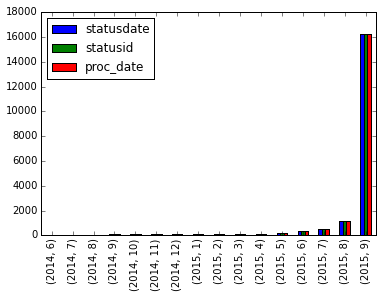

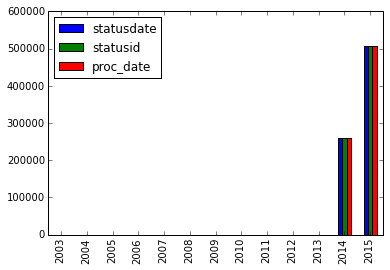

In [100]:
%matplotlib inline

grouped_status = statusid_and_date.groupby('statusid')
group1 = grouped_status.get_group(1)
group2 = grouped_status.get_group(2)

plt.fi
group1.groupby([group1.proc_date.dt.year, group1.proc_date.dt.month]).count().plot(kind="bar")
group2.groupby([group2.proc_date.dt.year]).count().plot(kind="bar")
